# Initialization

## Importing VPython

Import the class vector from vpythons module visual (or in this case vpython which is used for this notebook)

In [1]:
from vpython import vector

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Setting up the Problem

Definition of parameters

In [2]:
rM0 = 4.6    # in units of R0 
vM0 = 0.51   # in units of R0/T0
aM  = 0.99   # in units of R0/T0**2 
T   = 88.    # in units of T0
rS  = 3.e-7  # in units of R0

Initialize distance and velocity vectors

In [3]:
vec_rM0 = vector(0, rM0, 0)
vec_vM0 = vector(vM0, 0, 0)

Definition of the time step

In [336]:
dt = 2 * vM0 / aM / 5000

Define a function for the time evolution

In [337]:
def evolve_mercury(vec_rM_old, vec_vM_old, alpha):
    # Compute the strength of the acceleration
    aMS = aM * ( 1 + alpha * rS / vec_rM_old.mag  ) / vec_rM_old.mag**2
    # Multiply by the direction
    vec_aMS = - aMS * ( vec_rM_old / vec_rM_old.mag )
    # Update velocity vector
    vec_vM_new = vec_vM_old + vec_aMS * dt
    # Update position vector
    vec_rM_new = vec_rM_old + vec_vM_new * dt
    # Return the new vectors
    return vec_rM_new, vec_vM_new

# Graphical Representation

## Define the Objects

Define the initial coordinates; M = mercury, S = sun ...

... and the initial velocities.

Add a visible trajectory to mercury

# Computation

In [355]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import re

sns.set(style="whitegrid", font="Source Sans Prop", font_scale=1.4)

Execute the loop as long as t < T

In [339]:
res = {}

for alpha in np.linspace(0, 1.e4, 11):
    t      = 0
    
    print alpha

    vec_rM = vec_rM0
    vec_vM = vec_vM0

    xpos = []
    ypos = []
    vx   = []
    vy   = []
    turns= []

    turn = 0
    theta = []
    while t < T*10.2:
        vec_rM, vec_vM = evolve_mercury(vec_rM, vec_vM, alpha)
        xpos.append(vec_rM.x)
        ypos.append(vec_rM.y)
        vx.append(vec_vM.x)
        vy.append(vec_vM.y)
        turns.append(turn)
        if len(xpos)>4:
              if xpos[-3]**2 + ypos[-3]**2 >= xpos[-2]**2 + ypos[-2]**2 <= xpos[-1]**2 + ypos[-1]**2:
                    turn += 1
                    theta.append(np.arccos( ypos[-2] /  np.sqrt(xpos[-2]**2 + ypos[-2]**2) )/turn/2/np.pi*360)
                    turns[-3] = turns[-2] = turns[-1] = turn

        t = t + dt
    res[alpha] = theta

turns = np.array(turns)
xpos = np.array(xpos)
ypos = np.array(ypos)
vx = np.array(vx)
vy = np.array(vy)

0.0
1000.0
2000.0
3000.0
4000.0
5000.0
6000.0
7000.0
8000.0
9000.0
10000.0


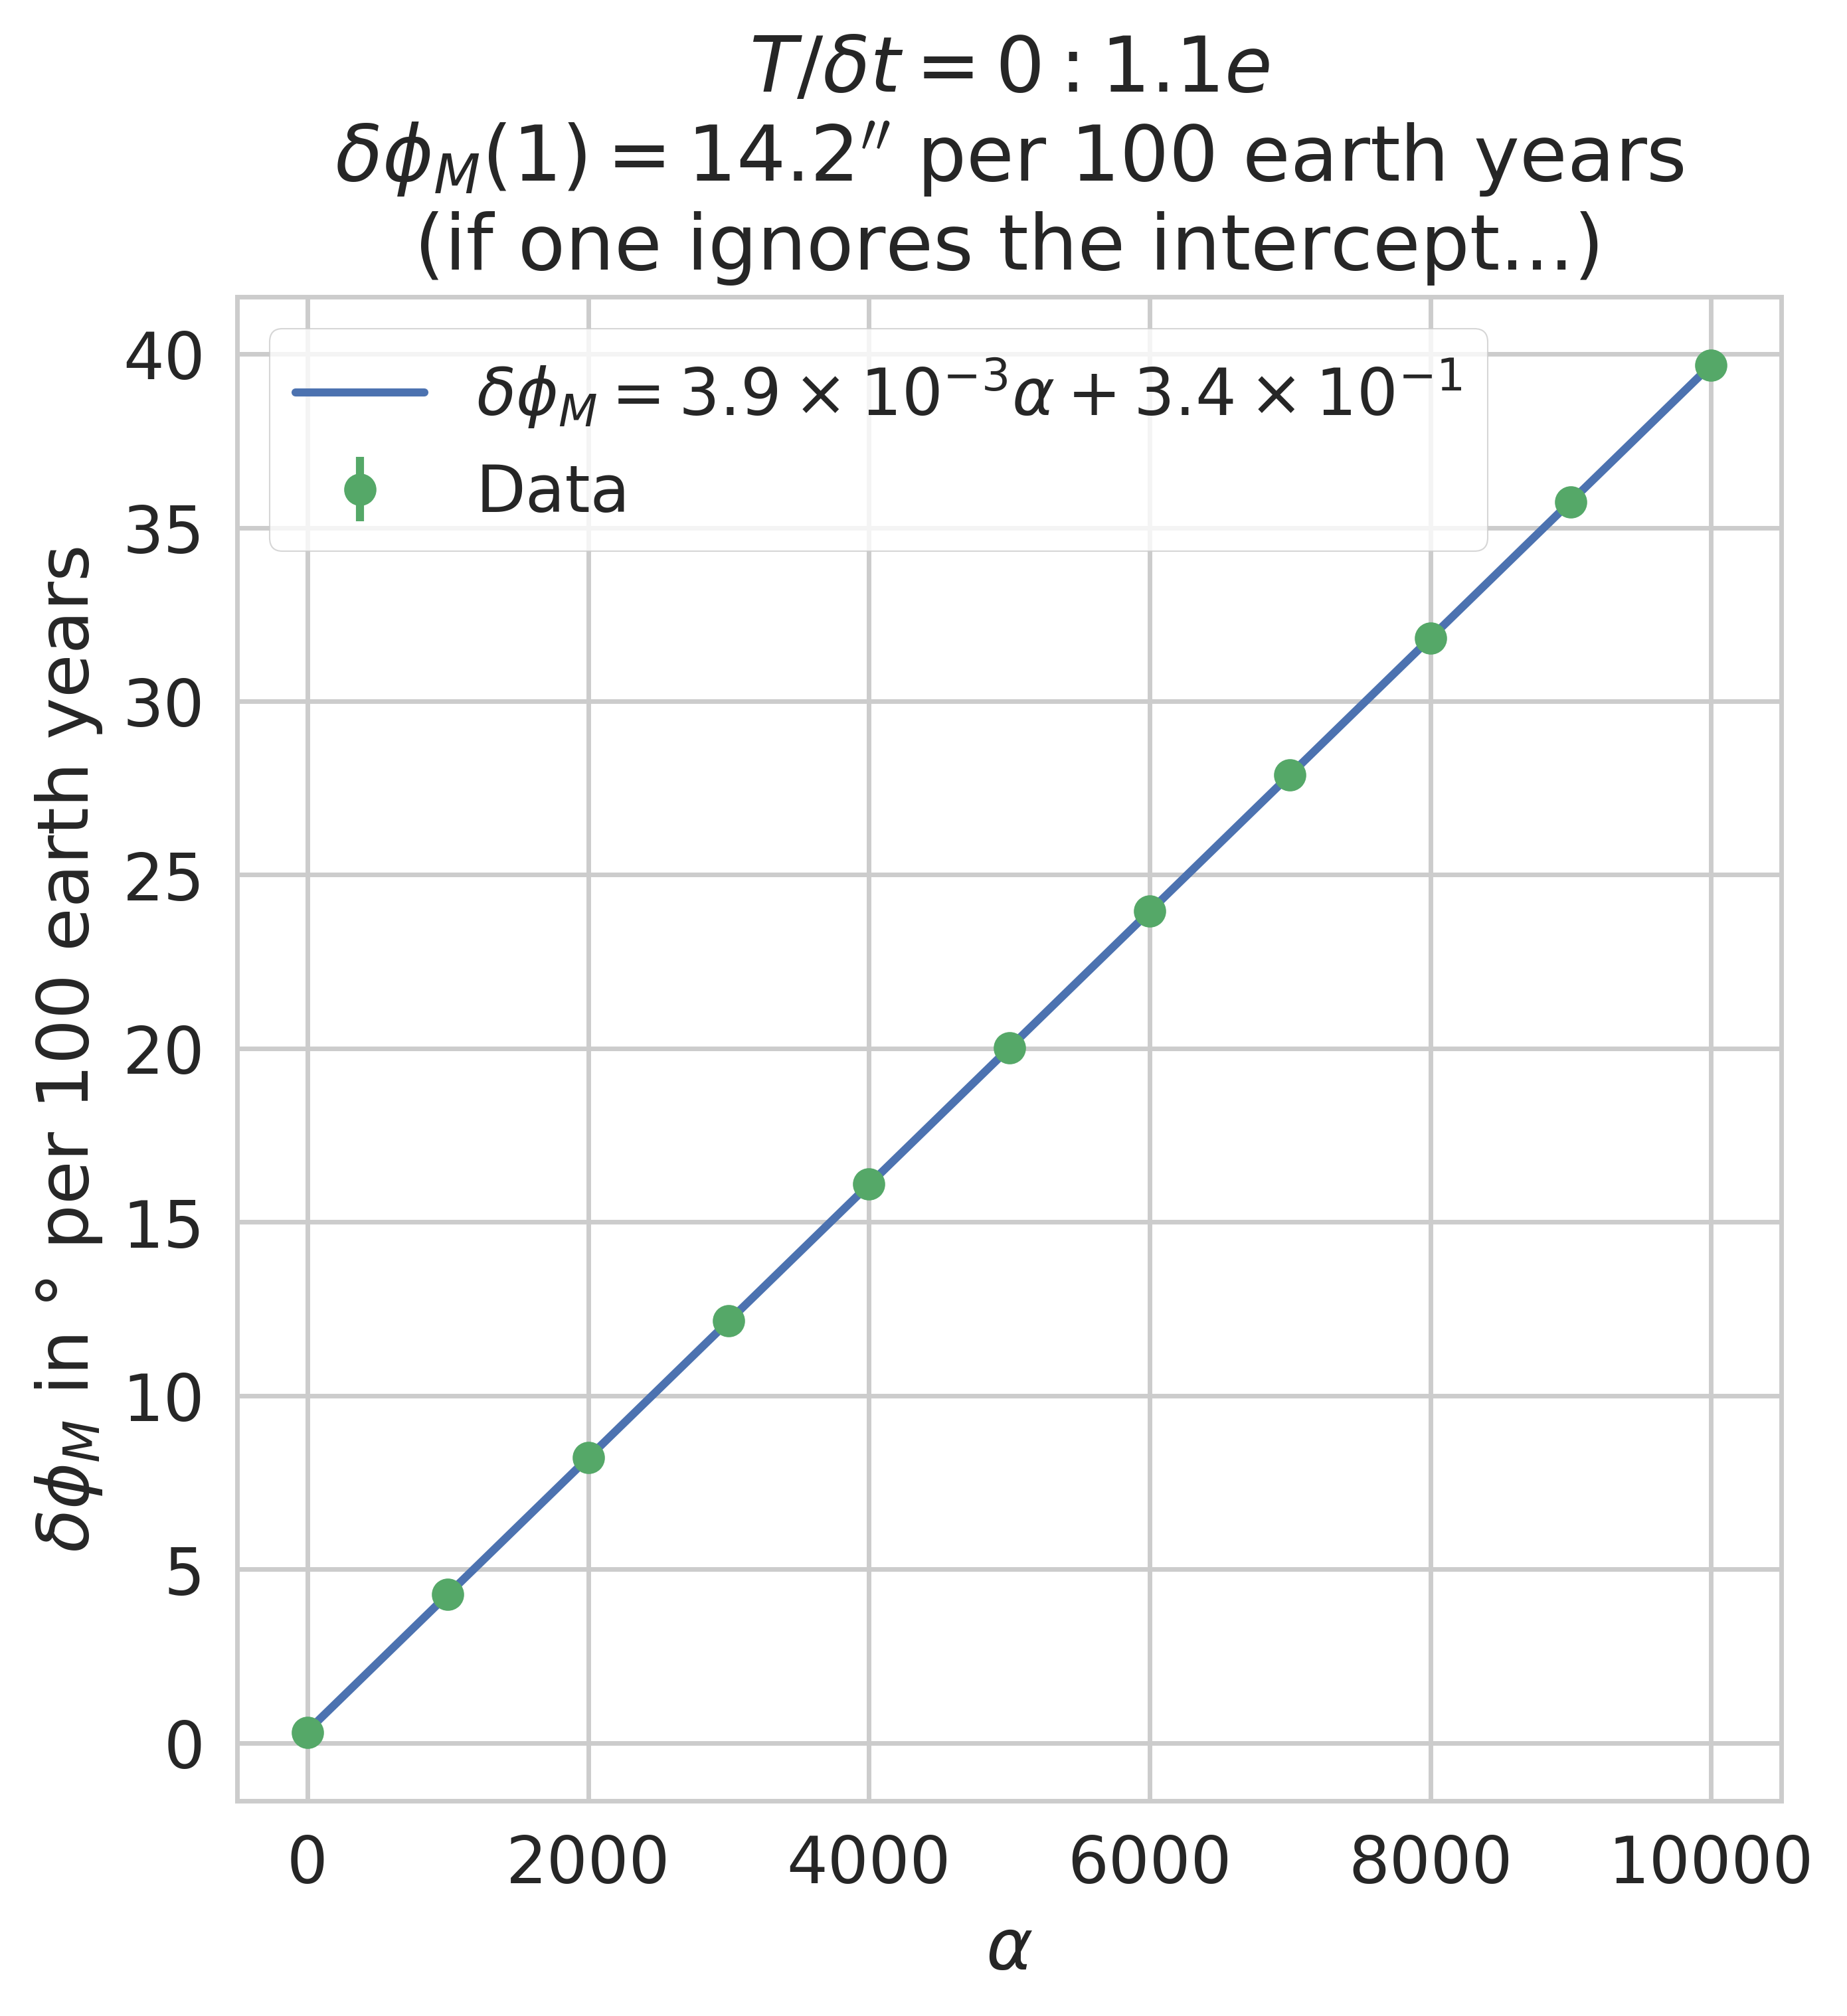

In [388]:
fig = sns.plt.figure(dpi=500, figsize=(6,6))

ax = fig.gca()

x, y = res.keys(), np.average(res.values(), axis=1)*356./88*100
dely = np.std(res.values(), axis=1)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)



xl = np.linspace(0, 1.e4, 200)

label = r"$\delta \phi _M = {m:1.1e}\alpha + {b:1.1e} $".format(m=slope, b=intercept).replace("0","")
label = re.sub(r"e([\+\-0-9]+)",r"\\times 10^{{\g<1>}}", label)

ax.plot(xl, intercept+slope*xl, label=label)
ax.errorbar(x, y, yerr=dely, marker="o", linestyle="None", label="Data")

sns.plt.legend(frameon=True, loc="upper left")

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(u"$\delta \phi _M$ in ° per 100 earth years")

title = "$T / \delta t = {0:1.1e}$"+\
        "\n$\delta \phi _M(1) = {1:1.1f}''$ per 100 earth years".format(T/dt, slope*3600).replace("+0","") +\
        "\n(if one ignores the intercept...)"
title = re.sub(r"e([\+\-0-9]+)",r"\\times 10^{{\g<1>}}", title)

ax.set_title(title)

sns.plt.show()

In [384]:
fig.savefig("alpha interpolation.pdf", bbox_inches)

14.165239922485402

In [348]:
dely

array([ 0.00068861,  0.00076298,  0.00068861,  0.0007893 ,  0.0007893 ,
        0.00077875,  0.00072125,  0.00077875,  0.0007893 ,  0.00074321,
        0.00076298])

In [326]:
r   = np.sqrt(np.array(xpos)**2 + np.array(ypos)**2)
phi = np.arccos( rM0*ypos / rM0 / r )
phi[xpos < 0] = - phi[xpos < 0] + 2*np.pi

In [262]:
for nel, el in enumerate(phi[1:]):
    if abs(el + 2*np.pi - phi[nel]) < abs(el - phi[nel]):
        phi[nel+1:] += 2*np.pi
        print nel+1, phi[nel+1]

74713 6.28321369688
149416 12.5664827297
224095 18.849638476
298739 25.1327482228
373338 31.4159839071
447879 37.6991877843
522350 43.9822996048
596742 50.2655033204
671044 56.5486968255
745248 62.831926237
819346 69.1150590918


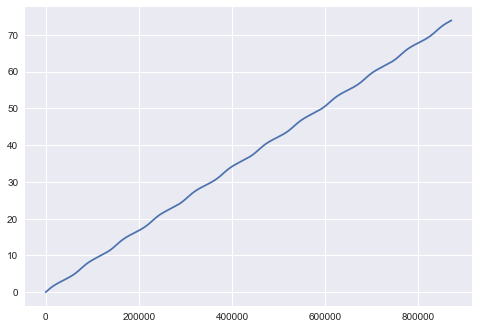

In [255]:
sns.plt.plot(phi)
sns.plt.show()

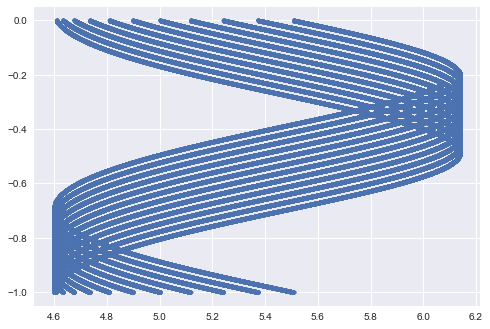

In [246]:
sns.plt.plot(r, phi/2/np.pi - 1. , ".")
sns.plt.show()

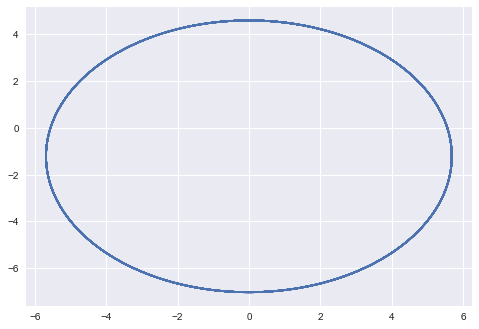

In [228]:
sns.plt.plot(xpos, ypos, "-")
sns.plt.show()

In [67]:
(xpos < 0).shape
(ypos < 0).shape
np.logical_and(xpos < 0, ypos < 0).shape

(854118,)